<a href="https://colab.research.google.com/github/dsirt/python-tbb/blob/main/19022025_tbbai_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Multiple Regression
"""
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
"""

'\ny = b0 + b1*x1 + b2*x2 + ... + bn*xn\n'

In [ ]:
dataset = pd.read_csv('/kaggle/input/50-startups-csv/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.shape

(50, 5)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

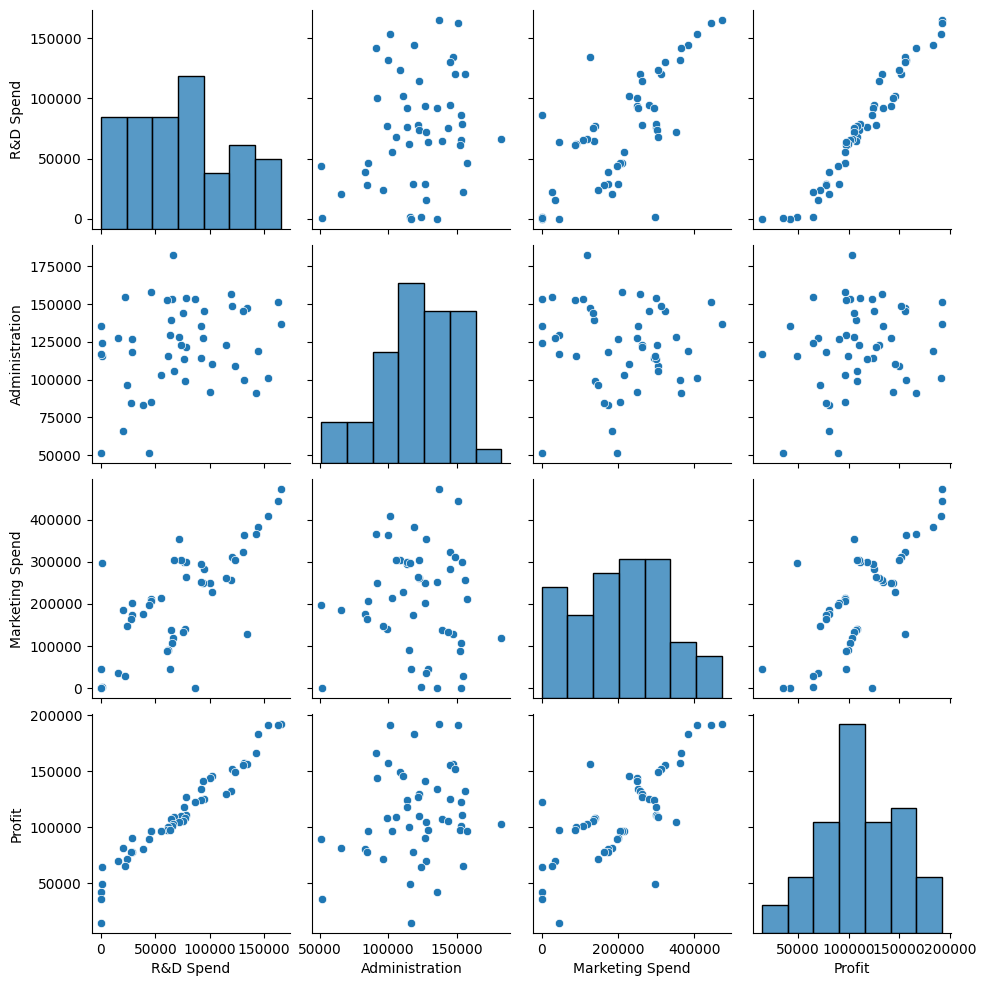

In [ ]:
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset = dataset.drop('State', axis = True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


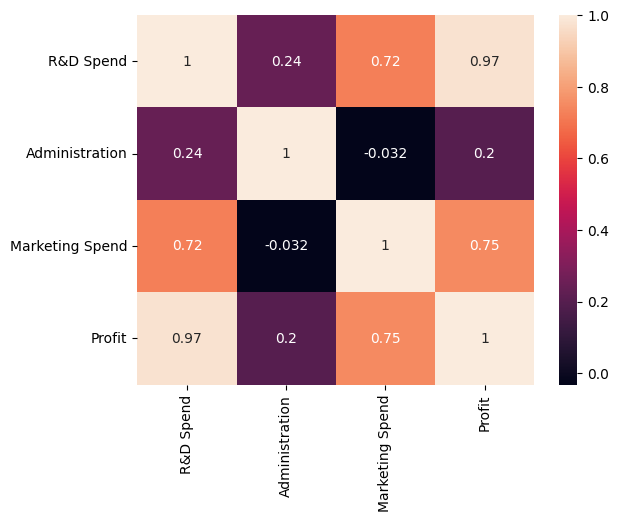

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
#bağımlı - bağımsız değişken ayrımı
X = dataset.drop('Profit', axis = 1)
y = dataset['Profit']

In [ ]:
#Normalizasyon (MinMaxScaler) - Standardizasyon (StandardScaler)
"""
z-score = x - mean / std.dev.
"""
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#modelimizi inşa edelim (eğitim)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#test, tahmin
y_pred = regressor.predict(X_test).round(2)

In [ ]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Profit', 'Predicted Profit'])
hesaplama.head()

,Original Profit,Predicted Profit
0,103282.38,103901.90
1,144259.40,132763.06
2,146121.95,133567.90
3,77798.83,72911.79
4,191050.39,179627.93


In [ ]:
#r2 score
print("Training threshold:", regressor.score(X_train, y_train))
print("Testing threshold:", regressor.score(X_test, y_test))

Training threshold: 0.9499572530324031
Testing threshold: 0.9393955917820571


In [ ]:
"""
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
"""
regressor.intercept_

111297.71256204927

In [ ]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [ ]:
#Test model
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [ ]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([192169.18440985])

In [ ]:
#Sınıflandırma (Classification)
#Bir ML sınıflandırma modeli için performans metrikleri
"""
1- Confusion Matrix (Karmaşıklık matrisi)
2- Accuracy (Başarım)
3- Precision (Kesinlik)
4- Recall (Hatırlama)
5- Specificity
6- F1-Score
"""

'\n1- Confusion Matrix (Karmaşıklık matrisi)\n2- Accuracy (Başarım)\n3- Precision (Kesinlik)\n4- Recall (Hatırlama)\n5- Specificity\n6- F1-Score\n'

In [ ]:
#K-Nearest Neighbour (K-En Yakın Komşu Algoritması)
data = pd.read_csv('/kaggle/input/data-cleaned-csv/data_cleaned.csv')
data.shape

(891, 25)

In [ ]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
"""

NameError: name 'MinMaxScaler' is not defined

In [ ]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
#GridSearch öncesi parametreleri tanımlama
param_grid = {
    "knn__n_neighbors" : [3,5,7,9,11], #K değeri
    "knn__weights" : ["uniform", "distance"], #tüm komşular eşit uzaklıkta (uniform), yoksa uzaklığa göre ağırlıklı mı (distance)
    "knn__metric" : ["euclidean", "manhattan", "minkowski"] #mesafe metriği
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler:", grid_search.best_params_)

In [ ]:
#En iyi modeli de test kümesinde kullanıyoruz
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
#Performans ölçümü
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Test Kümesi Başarımı:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#B planımız -> optimal K değerini bulmak için Dirsek (Elbow) metodu
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [ ]:
clf = KNN(n_neighbors = 10, metric = 'euclidean')

clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
k_1 = f1_score(test_predict, y_test)

In [ ]:
def Elbow(K):

    test_error = []

    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(X_train, y_train)
        tmp = clf.predict(X_test)
        tmp = f1_score(tmp, y_test)
        error = 1 - tmp
        test_error.append(error)

    return test_error

In [ ]:
k = range(6, 20, 2)
test = Elbow(k)

In [ ]:
#Dirseği görselleştirme
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for test')
plt.show()

In [ ]:
clf = KNN(n_neighbors = 17, metric = 'euclidean')

clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)
k_2 = f1_score(test_predict, y_test)

In [ ]:
print("Before Elbow:", k_1)
print("After Elbow:", k_2)

In [ ]:
#Decision Trees (Karar Ağaçları)

In [ ]:
dataset = pd.read_csv('/kaggle/input/social-network-ads-csv/Social_Network_Ads.csv')
dataset.head(5)

In [ ]:
"""
Feature Selection (Öznitelik Seçme):
1 - Variance Threshold: Düşük varyansa sahip olan öznitelikler kaldırılır.
2 - SelectKBest: testler yapılarak en iyi k sayıda özniteliği seçer.
3 - PCA (Temel Bileşenler Analizi): verideki en fazla varyans değerine sahip olan öznitelik grubunu seçer.
4 - RFE (Recursive Feature Elimination): öznitelikleri aşamalı olarak kaldırarak modelin performansına en çok katkı
sağlayan özniteliği seçer.
"""

In [ ]:
#Elle seçim
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [ ]:
#Algoritmaya özniteliği seçtirme
X = dataset.drop(columns = ["User ID", "Gender", "Purchased"])
y = dataset['Purchased']

In [ ]:
print("X içerisindeki öznitelikler:", X.columns.tolist())

In [ ]:
#SelectKBest ile en iyi öznitelikleri seçme
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func = f_classif, k = 2)
X_new = selector.fit_transform(X, y)

In [ ]:
selected_features = X.columns[selector.get_support()]

In [ ]:
print("Seçilen Öznitelikler:", selected_features)

In [ ]:
print("Yeni X matrisi:")
print(pd.DataFrame(X_new, columns = selected_features).head())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Standartlaştırma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy)
print(creport)

In [ ]:
from sklearn import tree

In [ ]:
fn = ['Age', 'EstimatedSalary']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50, 30))
tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
fig.savefig('/kaggle/working/1902-TBBAI.png')

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,
stop=X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start=X_set[:,0].min() - 1,
stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Unsupervised Learning (Denetimsiz Öğrenme)
#Clustering (Kümeleme)
"""
1- Sahte Haber Tespiti
2- Spam Filtreleme
3- Pazarlama ve Satış Operasyonları
4- Ağ trafiği kümeleme
5- Sahtecilik ve suç içeren aktivitelerin tespiti
6- Deprem çalışmaları
"""

In [ ]:
#K-Means (K-Ortalamalar) Algoritması, Müşteri Davranışı Analizi Uygulaması
dataset = pd.read_csv('/kaggle/input/mall-customers-csv/Mall_Customers.csv')
dataset.head()

In [ ]:
dataset.shape

In [ ]:
X = dataset.iloc[:, 3:]
X.head()

In [ ]:
#Uygun K değerini bulmak için dirsek (elbow) metodu
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#K = 5

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

In [ ]:
test = kmeans.predict([[16, #Annual Income (k$)
                       77 #Spending Score (1-100)
                      ]])
print("Bu nokta", test[0], "numaralı kümeye aittir.")

In [ ]:
X[y_kmeans == 0].head(10)

In [ ]:
#Kümeleri Görselleştirmek
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#Hiyerarşik kümeleme
#Agglomerative, Divisive

In [ ]:
customer_data = pd.read_csv('/kaggle/input/mall-customers-csv/Mall_Customers.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = customer_data.iloc[:, 3:5].values

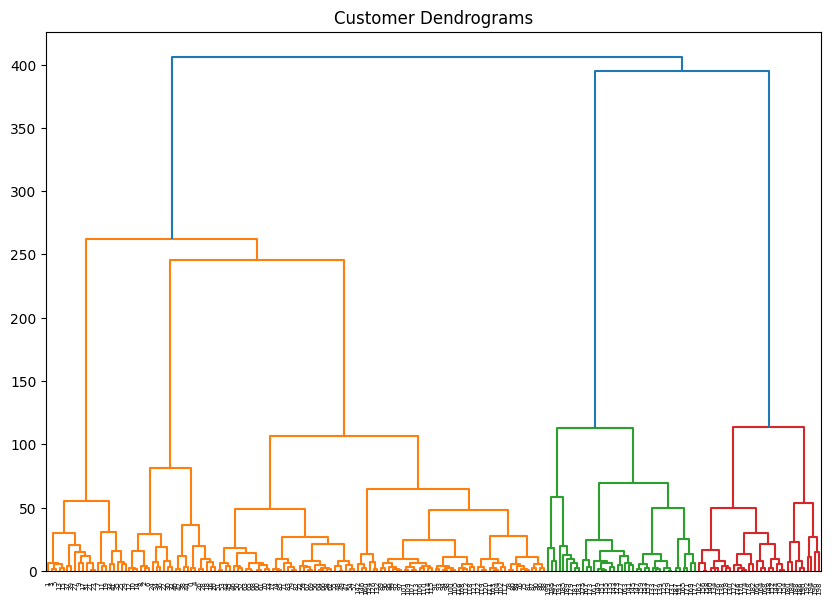

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))
plt.show()

In [ ]:
#Küme sayısı = 5 (grafikten)

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

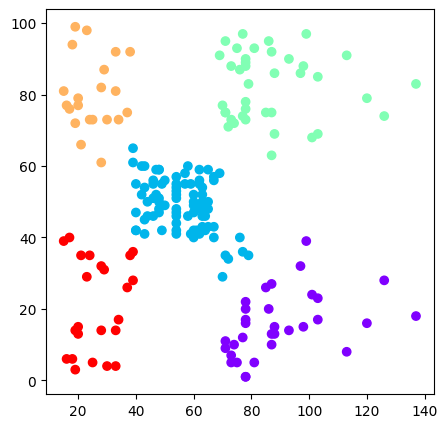

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.show()